# Assigment 1
### DAT158

In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

### Upload data

You need to download the dataset from the kaggle competition. Then you can use pandas to get the .csv file

In [3]:
path_data = 'Data'

In [4]:
data = pd.read_csv(path_data + '/housing_data.csv')

In [5]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.13,37.67,40.0,1748.0,318.0,914.0,317.0,3.8676,184000.0,NEAR BAY
1,-120.98,37.65,40.0,422.0,63.0,158.0,63.0,7.3841,172200.0,INLAND
2,-118.37,33.87,23.0,1829.0,331.0,891.0,356.0,6.5755,359900.0,<1H OCEAN
3,-117.89,33.90,23.0,1533.0,226.0,693.0,230.0,7.8980,258200.0,<1H OCEAN
4,-122.40,37.76,52.0,1529.0,385.0,1347.0,348.0,2.9312,239100.0,NEAR BAY


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16512 entries, 0 to 16511
Data columns (total 10 columns):
longitude             16512 non-null float64
latitude              16512 non-null float64
housing_median_age    16512 non-null float64
total_rooms           16512 non-null float64
total_bedrooms        16344 non-null float64
population            16512 non-null float64
households            16512 non-null float64
median_income         16512 non-null float64
median_house_value    16512 non-null float64
ocean_proximity       16512 non-null object
dtypes: float64(9), object(1)
memory usage: 1.3+ MB


In [7]:
data['ocean_proximity'].value_counts()

<1H OCEAN     7346
INLAND        5214
NEAR OCEAN    2112
NEAR BAY      1835
ISLAND           5
Name: ocean_proximity, dtype: int64

In [8]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,16512.000000,16512.000000,16512.000000,16512.000000,16344.000000,16512.000000,16512.000000,16512.000000,16512.000000
mean,-119.568763,35.630270,28.714571,2636.885841,537.999755,1425.131783,499.837936,3.871083,207262.390080
std,2.003747,2.137134,12.589203,2195.840228,422.944167,1126.453504,383.400473,1.909994,115838.329585
min,-124.350000,32.540000,1.000000,6.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1445.000000,295.000000,787.000000,279.000000,2.562500,120000.000000
50%,-118.490000,34.260000,29.000000,2122.500000,434.000000,1163.000000,409.000000,3.529450,180400.000000
75%,-118.010000,37.710000,37.000000,3137.000000,646.000000,1723.000000,603.000000,4.746450,265100.000000
max,-114.310000,41.950000,52.000000,39320.000000,6210.000000,35682.000000,5358.000000,15.000100,500001.000000


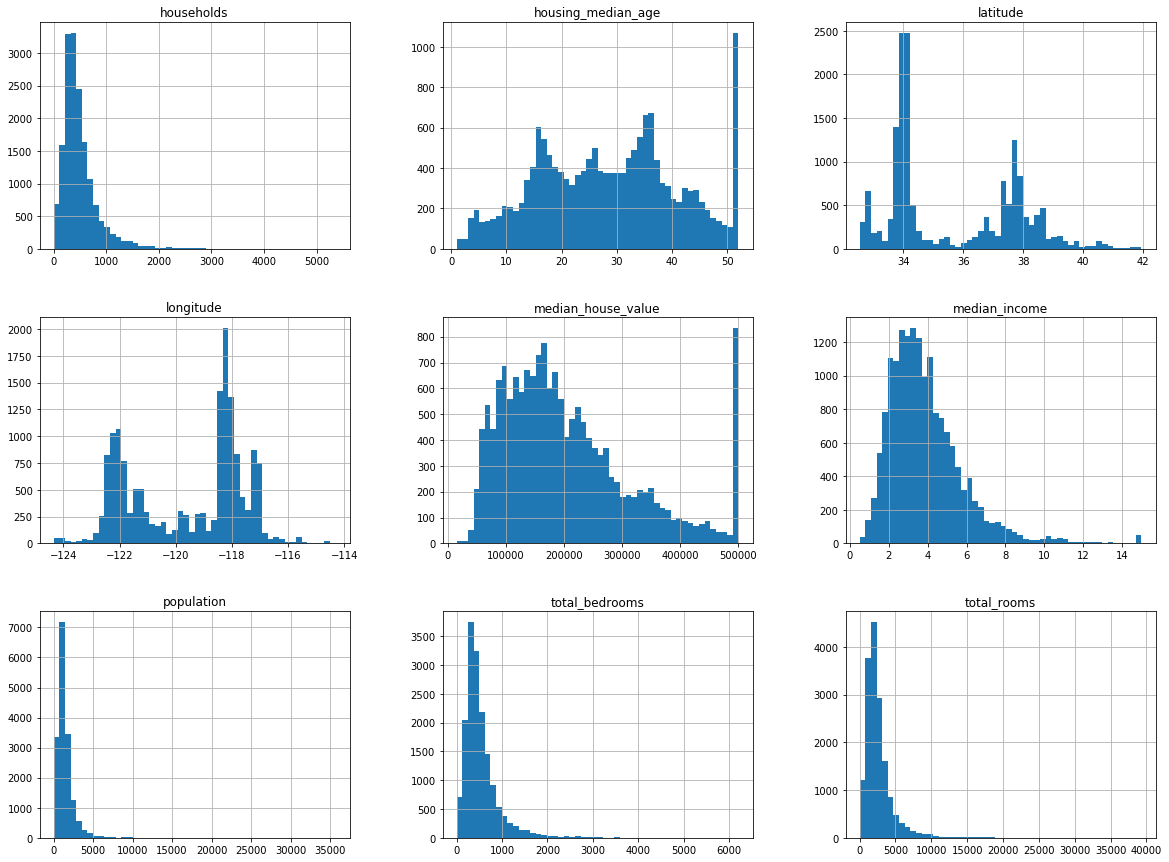

In [9]:
data.hist(bins=50, figsize = (20,15))
plt.show()

## Visualizing Geographical Data

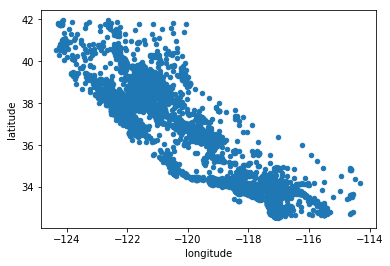

In [10]:
data.plot(kind="scatter", x="longitude", y="latitude")

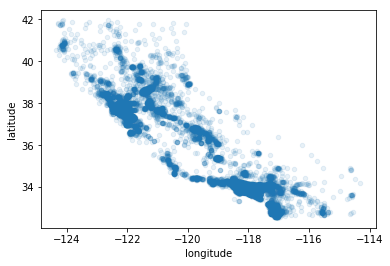

In [11]:
data.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

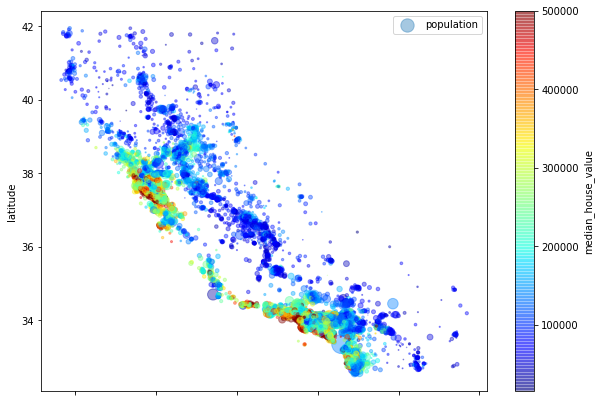

In [12]:
data.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4, s = data["population"]/100, label = "population", figsize=(10,7), c = "median_house_value", cmap = plt.get_cmap("jet"), colorbar = True,)
plt.legend()

In [13]:
corr_matrix = data.corr()
corr_matrix["median_house_value"].sort_values(ascending = False)

median_house_value    1.000000
median_income         0.684828
total_rooms           0.133566
housing_median_age    0.107684
households            0.065778
total_bedrooms        0.049941
population           -0.025008
longitude            -0.043824
latitude             -0.146748
Name: median_house_value, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f349b8d3390>,
      dtype=object)

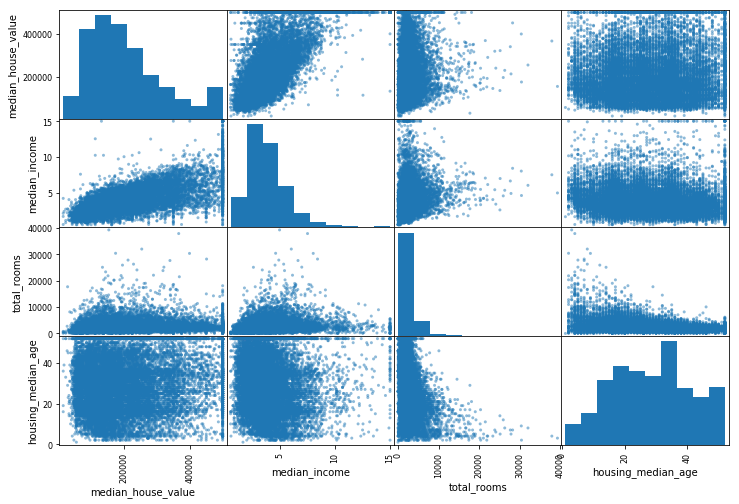

In [14]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(data[attributes], figsize=(12, 8))

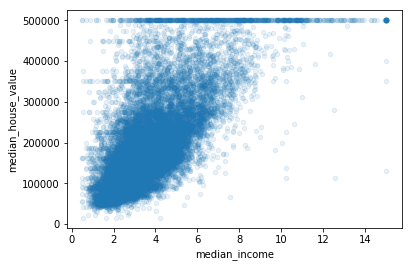

In [15]:
data.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1)

## Experimenting with attribute combinations

In [16]:
data["rooms_per_household"] = data["total_rooms"]/data["households"]
data["bedrooms_per_room"] = data["total_bedrooms"]/data["total_rooms"]
data["population_per_houshold"] = data["population"]/data["households"]

In [17]:
corr_matrix = data.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value         1.000000
median_income              0.684828
rooms_per_household        0.171947
total_rooms                0.133566
housing_median_age         0.107684
households                 0.065778
total_bedrooms             0.049941
population                -0.025008
population_per_houshold   -0.026596
longitude                 -0.043824
latitude                  -0.146748
bedrooms_per_room         -0.256396
Name: median_house_value, dtype: float64

### Preprosess data

In [32]:
X = data.drop(['median_house_value'], axis=1)
y = data['median_house_value']

In [33]:
X.isnull().sum()

longitude                    0
latitude                     0
housing_median_age           0
total_rooms                  0
total_bedrooms             168
population                   0
households                   0
median_income                0
ocean_proximity              0
rooms_per_household          0
bedrooms_per_room          168
population_per_houshold      0
dtype: int64

In [34]:
#X.dropna(subset=[total_bedrooms])
#X.drop("total_bedroms", axis = 1)
median = X['total_bedrooms'].median()
X['total_bedrooms'].fillna(median, inplace=True)
X['ocean_proximity'].unique()

array(['NEAR BAY', 'INLAND', '<1H OCEAN', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [35]:
X.isnull().sum()

longitude                    0
latitude                     0
housing_median_age           0
total_rooms                  0
total_bedrooms               0
population                   0
households                   0
median_income                0
ocean_proximity              0
rooms_per_household          0
bedrooms_per_room          168
population_per_houshold      0
dtype: int64

#### Incom category

In [38]:
X["income_cat"] = np.ceil(X["median_income"]/ 1.5)
X["income_cat"].where(X["income_cat"] < 5, 5.0, inplace = True)
X.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_houshold,income_cat
0,-122.13,37.67,40.0,1748.0,318.0,914.0,317.0,3.8676,NEAR BAY,5.514196,0.181922,2.883281,3.0
1,-120.98,37.65,40.0,422.0,63.0,158.0,63.0,7.3841,INLAND,6.698413,0.149289,2.507937,5.0
2,-118.37,33.87,23.0,1829.0,331.0,891.0,356.0,6.5755,<1H OCEAN,5.137640,0.180973,2.502809,5.0
3,-117.89,33.90,23.0,1533.0,226.0,693.0,230.0,7.8980,<1H OCEAN,6.665217,0.147423,3.013043,5.0
4,-122.40,37.76,52.0,1529.0,385.0,1347.0,348.0,2.9312,NEAR BAY,4.393678,0.251799,3.870690,2.0


#### Label Encoder

In [14]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
X_label_encoded = X.copy()
X_label_encoded['ocean_proximity'] = label_encoder.fit_transform(X_label_encoded['ocean_proximity'])

In [15]:
X_label_encoded.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.13,37.67,40.0,1748.0,318.0,914.0,317.0,3.8676,3
1,-120.98,37.65,40.0,422.0,63.0,158.0,63.0,7.3841,1
2,-118.37,33.87,23.0,1829.0,331.0,891.0,356.0,6.5755,0
3,-117.89,33.90,23.0,1533.0,226.0,693.0,230.0,7.8980,0
4,-122.40,37.76,52.0,1529.0,385.0,1347.0,348.0,2.9312,3


### One-Hot Encoding

In [16]:
from sklearn.preprocessing import OneHotEncoder

onehot_encoder = OneHotEncoder(sparse=False)
X_onehot_encoded = pd.get_dummies(X ,prefix=['ocean_proximity'])


In [17]:
X_onehot_encoded.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.13,37.67,40.0,1748.0,318.0,914.0,317.0,3.8676,0,0,0,1,0
1,-120.98,37.65,40.0,422.0,63.0,158.0,63.0,7.3841,0,1,0,0,0
2,-118.37,33.87,23.0,1829.0,331.0,891.0,356.0,6.5755,1,0,0,0,0
3,-117.89,33.90,23.0,1533.0,226.0,693.0,230.0,7.8980,1,0,0,0,0
4,-122.40,37.76,52.0,1529.0,385.0,1347.0,348.0,2.9312,0,0,0,1,0


### Income category

In [ ]:
#label_encoded
X_label_encoded

## Split Data

In [18]:
from sklearn.model_selection import train_test_split

X_train_label, X_val_label, y_train_label, y_val_label = train_test_split(X_label_encoded, y, random_state=42, stratify = ['income'])

In [19]:
X_train_onehot, X_val_onehot, y_train_onehot, y_val_onehot = train_test_split(X_onehot_encoded, y, random_state=42)

In [20]:
print('X train: ' + str(X_train_label.shape))
print('y train: ' + str(y_train_label.shape))
print('X val: ' + str(X_val_label.shape))
print('y val: ' + str(y_val_label.shape))

X train: (12384, 9)
y train: (12384,)
X val: (4128, 9)
y val: (4128,)


## Random Forest

In [25]:
from sklearn.ensemble import RandomForestClassifier

In [28]:
rf = RandomForestClassifier(random_state=42, n_estimators=100)

rf.fit(X_train_label, y_train_label)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [29]:
y_pred_label = rf.predict(X_val_label)

In [30]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse = sqrt(mean_squared_error(y_val_label, y_pred_label))
rmse

71530.44169245215

In [26]:
rf = RandomForestClassifier(random_state=42, n_estimators=100)

rf.fit(X_train_onehot, y_train_onehot)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [27]:
y_pred_onehot = rf.predict(X_val_onehot)

In [28]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse = sqrt(mean_squared_error(y_val_onehot, y_pred_onehot))
rmse

71409.95983827244